# Song Popularity Predictor

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import sklearn

## Part 1: Data Cleaning, Exploration, and Feature Engineering

For this part of the of the assignment, we are gonna read in the data then
perform our data cleaning on it.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('dataset.csv')

data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


The first thing we want to is drop the 'track_name' column because the track name should not matter in determining popularity.

In [ ]:
data.drop(labels=['track_name', 'album_name', 'Unnamed: 0'], axis=1, inplace=True)
# data.head()
data.shape

(114000, 18)

In [ ]:
data.dropna(subset=['artists'], inplace=True)
data.shape

(113999, 18)

For the 'artists' column, we want to put the artist names into a list if there are multiple of them.

In [ ]:
data['artists'] = data['artists'].apply(lambda artist: str(artist).split(';'))
# data.head()

In [ ]:
data['explicit'].replace(False, value=0, inplace=True)
data['explicit'].replace(True, value=1, inplace=True)

For the 'duration' column, we want to scale the duration down from ms to s so that the data is more readable and closer together for visualization.

In [ ]:
data['duration'] = data['duration_ms'] / 1000
data.drop(labels=['duration_ms'], axis=1, inplace=True)
data

,track_id,artists,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration
0,5SuOikwiRyPMVoIQDJUgSV,[Gen Hoshino],73,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,230.666
1,4qPNDBW1i3p13qLCt0Ki3A,[Ben Woodward],55,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,149.610
2,1iJBSr7s7jYXzM8EGcbK5b,"[Ingrid Michaelson, ZAYN]",57,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,210.826
3,6lfxq3CG4xtTiEg7opyCyx,[Kina Grannis],71,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,201.933
4,5vjLSffimiIP26QG5WcN2K,[Chord Overstreet],82,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,198.853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,[Rainy Lullaby],21,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,384.999
113996,1hIz5L4IB9hN3WRYPOCGPw,[Rainy Lullaby],22,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,385.000
113997,6x8ZfSoqDjuNa5SVP5QjvX,[Cesária Evora],22,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,271.466
113998,2e6sXL2bYv4bSz6VTdnfLs,[Michael W. Smith],41,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,283.893


In [ ]:
data = data[['track_id', 'artists', 'duration', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'track_genre', 'popularity']]
data.head()

,track_id,artists,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,5SuOikwiRyPMVoIQDJUgSV,[Gen Hoshino],230.666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,73
1,4qPNDBW1i3p13qLCt0Ki3A,[Ben Woodward],149.610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,55
2,1iJBSr7s7jYXzM8EGcbK5b,"[Ingrid Michaelson, ZAYN]",210.826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,57
3,6lfxq3CG4xtTiEg7opyCyx,[Kina Grannis],201.933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,71
4,5vjLSffimiIP26QG5WcN2K,[Chord Overstreet],198.853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,82


We want to create a good threshold to create our class label for popularity. For this, we need to do some data visualization on the popularity scores of the records. For this, we will create a scatter plot of popularity to find a natural split in the data.

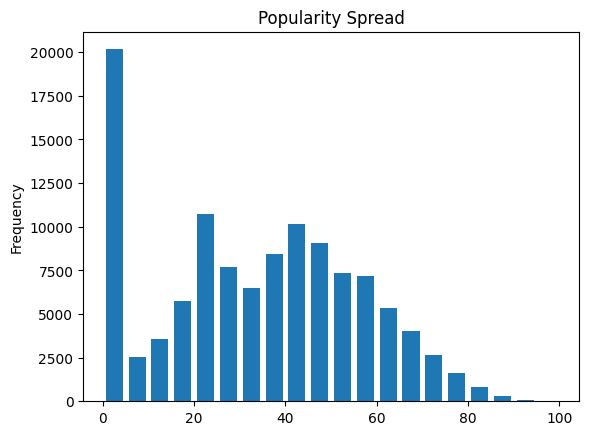

In [ ]:
# for x in range(0, 100, 5):
plt = data['popularity'].plot(kind='hist', title='Popularity Spread', bins=20, rwidth=0.75)


As we can see in the histogram above, there is clearly a class imbalance, as there are significantly more songs categorized between 0-5 popularity.

count    113999.000000
mean         33.238827
std          22.304959
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

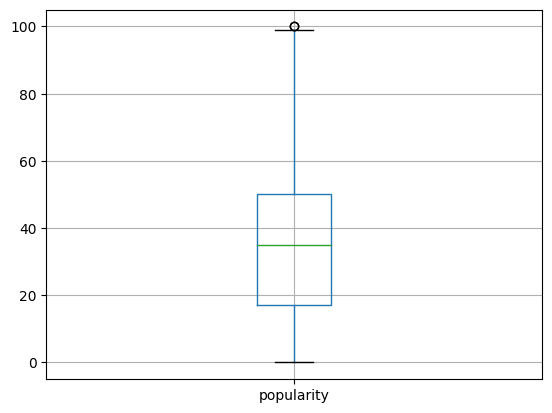

In [ ]:
data.boxplot(['popularity'])
data['popularity'].describe()

Looking at these various distributions, we want to establish that a popular song is one with a score at or above 50. However, we need to account for the class imbalance, so we will run a SMOTE analysis on popularity once we get to it.

As we can see by the cell below, every genre in our dataset has around 1000 records.

In [ ]:
genre_counts = data.groupby(['track_genre']).describe()['duration']['count']
unique = pd.unique(pd.Series(genre_counts))
print("Unique Genre Counts: " + str(unique))

Unique Genre Counts: [1000.  999.]


                 count       mean        std  min   25%   50%   75%   max
track_genre                                                              
iranian         1000.0   2.210000   4.174125  0.0   0.0   0.0   3.0  33.0
romance         1000.0   3.245000   6.296397  0.0   0.0   0.0   5.0  35.0
latin           1000.0   8.297000  21.961947  0.0   0.0   0.0   2.0  98.0
detroit-techno  1000.0  11.174000   8.949179  0.0   6.0   8.0  12.0  58.0
chicago-house   1000.0  12.339000   9.581748  0.0   7.0  10.0  14.0  78.0
...                ...        ...        ...  ...   ...   ...   ...   ...
grunge          1000.0  49.594000  18.488726  0.0  41.0  55.0  62.0  85.0
sad             1000.0  52.379000  11.492756  0.0  48.0  54.0  58.0  83.0
chill           1000.0  53.651000  14.951279  0.0  51.0  57.0  61.0  93.0
k-pop            999.0  56.952953  16.858922  0.0  48.0  60.0  69.0  88.0
pop-film        1000.0  59.283000  10.249388  0.0  57.0  60.0  64.0  80.0

[114 rows x 8 columns]


<Axes: xlabel='track_genre'>

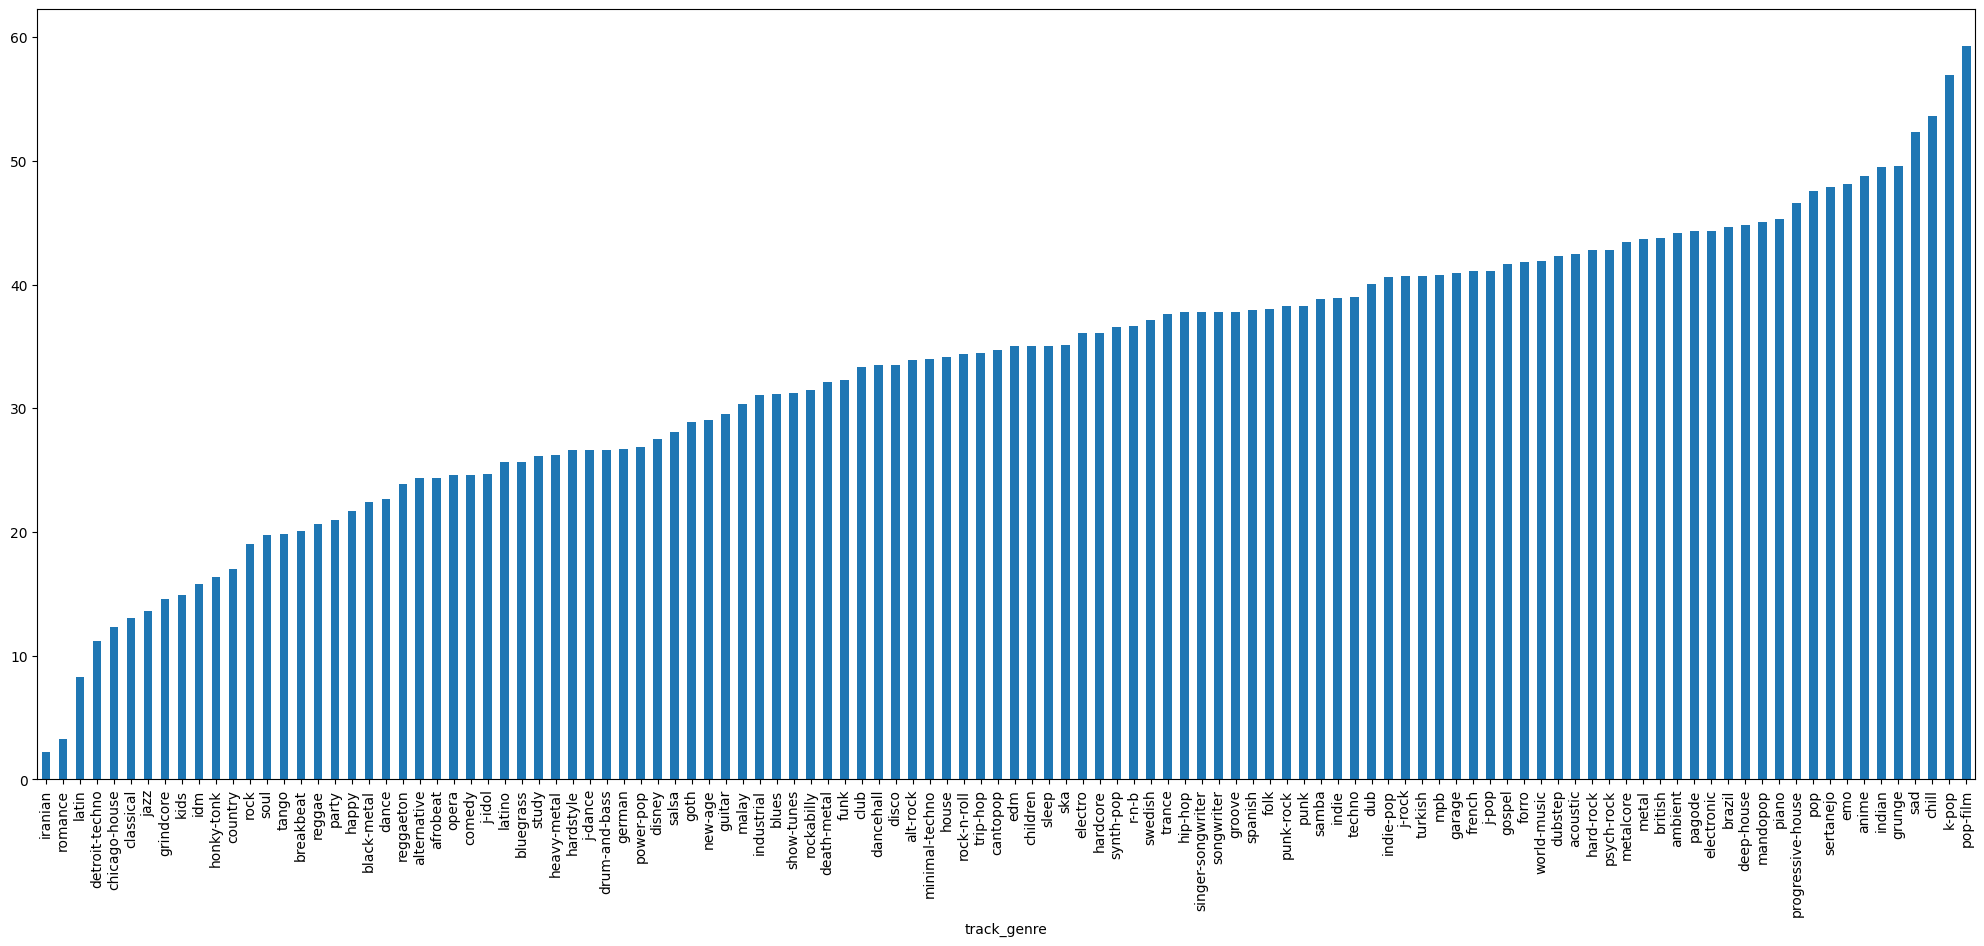

In [ ]:
pop_data = data.groupby('track_genre').describe()
pop_data = pop_data['popularity']
pop_data.sort_values(by="mean", inplace=True)
print(pop_data)
pop_data = pop_data['mean']
pop_data.plot(kind='bar', figsize=(25,10))

We want to go through every record that is less than 50 and give it a label 0 to say that it is not popular. Everything else will be given a label of one that is popular.

In [ ]:
def ternary(popular):
  return 1 if popular >= 50 else 0

data['Popular'] = data['popularity'].apply(lambda popularity: ternary(popularity))
data.head(30)

<ipython-input-15-c8781af9eaf3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Popular'] = data['popularity'].apply(lambda popularity: ternary(popularity))


,track_id,artists,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity,Popular
0,5SuOikwiRyPMVoIQDJUgSV,[Gen Hoshino],230.666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,73,1
1,4qPNDBW1i3p13qLCt0Ki3A,[Ben Woodward],149.610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,55,1
2,1iJBSr7s7jYXzM8EGcbK5b,"[Ingrid Michaelson, ZAYN]",210.826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,57,1
3,6lfxq3CG4xtTiEg7opyCyx,[Kina Grannis],201.933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,71,1
4,5vjLSffimiIP26QG5WcN2K,[Chord Overstreet],198.853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,82,1
5,01MVOl9KtVTNfFiBU9I7dc,[Tyrone Wells],214.240,0,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,58,1
6,6Vc5wAMmXdKIAM7WUoEb7N,"[A Great Big World, Christina Aguilera]",229.400,0,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,74,1
7,1EzrEOXmMH3G43AXT1y7pA,[Jason Mraz],242.946,0,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,80,1
8,0IktbUcnAGrvD03AWnz3Q8,"[Jason Mraz, Colbie Caillat]",189.613,0,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic,74,1
9,7k9GuJYLp2AzqokyEdwEw2,[Ross Copperman],205.594,0,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,56,1


Now we can drop the popularity column.

In [ ]:
data.drop(labels=['popularity'], axis=1, inplace=True)
data.head()

,track_id,artists,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Popular
0,5SuOikwiRyPMVoIQDJUgSV,[Gen Hoshino],230.666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1
1,4qPNDBW1i3p13qLCt0Ki3A,[Ben Woodward],149.610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1
2,1iJBSr7s7jYXzM8EGcbK5b,"[Ingrid Michaelson, ZAYN]",210.826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1
3,6lfxq3CG4xtTiEg7opyCyx,[Kina Grannis],201.933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1
4,5vjLSffimiIP26QG5WcN2K,[Chord Overstreet],198.853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


This graph shows the number of popular songs by genre utilizing the new label 'Popular' that we just added. As we can see, the data did not change very much.

<Axes: xlabel='track_genre', ylabel='Number of Popular Songs'>

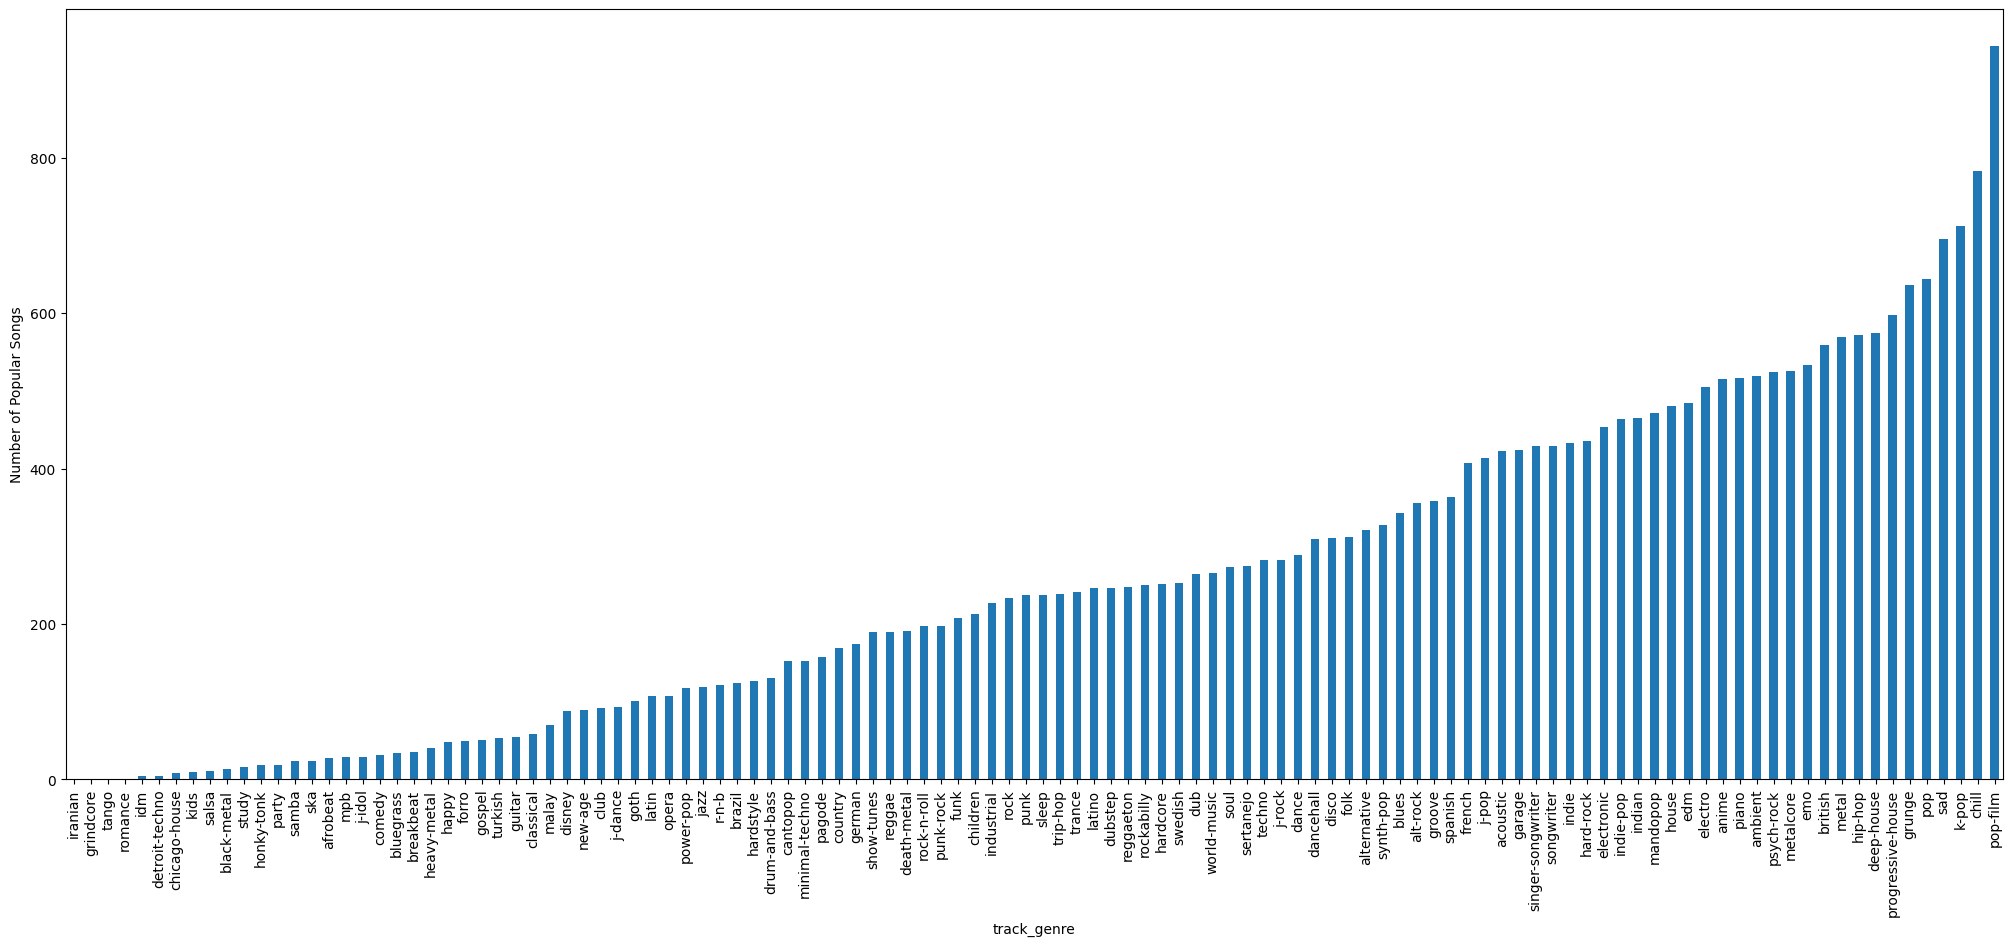

In [ ]:
pop_data = data.groupby('track_genre').describe()
pop_data = pop_data['Popular']
pop_data.sort_values(by="mean", inplace=True)
pop_data = pop_data['mean'] * 1000
pop_data.plot(kind='bar', figsize=(25,10), ylabel='Number of Popular Songs')

Because of the sheer amount of artists and track_genres (over 140), we are going to drop those columns as we have a lot of information without them already. Most songs in the same genre will have similar stats and it will save us having to one hot encode for every artist and genre.

In [ ]:
data.drop(['track_id', 'artists', 'track_genre'], axis = 1, inplace=True)
print(data.shape)
data.head()

(113999, 15)


,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Popular
0,230.666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,1
1,149.610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,1
2,210.826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,1
3,201.933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,1
4,198.853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1


As we can see from the graph below, the number of popular songs is about a third of the dataset and the unpopular songs are about two-thirds of the dataset. This means we may have to do a SMOTE run on our pipelines in order to take care of this imbalance properly.

<Axes: xlabel='Popularity Value Label', ylabel='Number of Songs'>

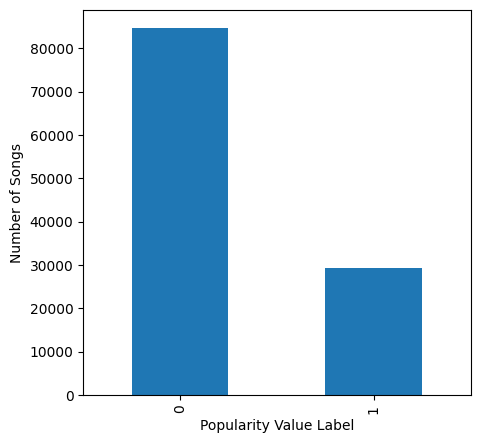

In [ ]:
pop_count = data.groupby('Popular').describe()
pop_count = pop_count['duration']['count']
pop_count.plot(kind='bar', figsize=(5,5), ylabel='Number of Songs', xlabel='Popularity Value Label')

## Part 2: The Models

Now that we have explored our data somewhat and done some feature engineering, we are ready to try different algorithms using the information that we learned above.

Creating a labels and features dataset.

In [ ]:
features = data.drop(['Popular'], axis = 1)
labels = data['Popular']
print(features.shape)
print(len(labels))

(113999, 14)
113999


Looking at these various distributions, we want to establish that a popular song is one with a score at or above 75. However, we need to account for the class imbalance, so we will run a SMOTE analysis on popularity once we get to it.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.pipeline import Pipeline as skpipe
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

scaler = StandardScaler()

s = SMOTE(sampling_strategy='not minority')

pca = PCA()

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=.2)


### KNN

In [ ]:
knc = KNeighborsClassifier(n_neighbors=7)
ibpipe = imbpipe(steps=[('smote', SMOTE()), ('scaler', scaler), ('pca', pca), ('knc', knc)])

pipe  = skpipe(steps=[('scaler', scaler), ('pca', pca), ('knc', knc)])

score = cross_val_score(ibpipe, features, labels, cv=5)
print(score.mean()*100)

62.376848823009325


In [ ]:
param_grid = {
    'pca__n_components': list(range(11, 15)),
    'knc__n_neighbors': list(range(3, 11, 2))
}

grid_search_knn = GridSearchCV(ibpipe, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(features, labels)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knc',
                                        KNeighborsClassifier(n_neighbors=7))]),
             param_grid={'knc__n_neighbors': [3, 5, 7, 9],
                         'pca__n_components': [11, 12, 13, 14]},
             scoring='accuracy')

In [ ]:
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_*100)

{'knc__n_neighbors': 3, 'pca__n_components': 14}
65.54529703903602


In [ ]:
pred = cross_val_predict(grid_search_knn.best_estimator_, features, labels, cv=5)

print('\n\n', classification_report(labels, pred))



               precision    recall  f1-score   support

           0       0.75      0.95      0.84     84632
           1       0.41      0.11      0.17     29367

    accuracy                           0.73    113999
   macro avg       0.58      0.53      0.51    113999
weighted avg       0.67      0.73      0.67    113999



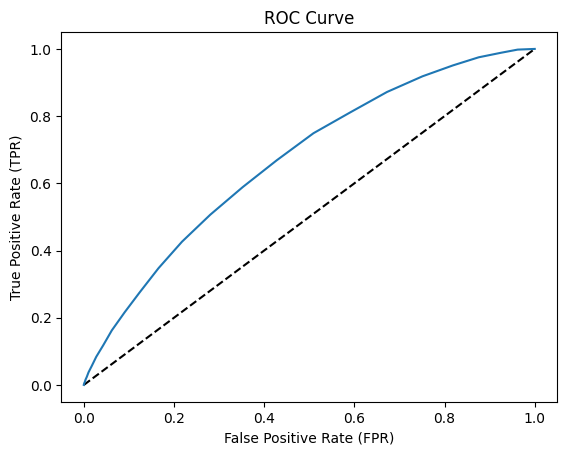

In [ ]:
final_model = grid_search_knn.best_estimator_.fit(x_train, y_train)
y_pred = final_model.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_pred)

plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.show(block=True)

### SVC

Now we will be testing the SVC. We made our parameter grid changing the pca componenets since we will have to pca for this. We also changed the different types of kernel objects for our grid.

In [ ]:
from sklearn.metrics import classification_report

svm = sklearn.svm.SVC()
# pip = skpipe([('scaler', scaler), ('pca', pca), ('svc', svm)])
my_pca = PCA(n_components=14)
ibpipe = imbpipe(steps=[('smote', SMOTE()), ('scaler', scaler), ('pca', my_pca), ('svc', svm)])
param_grid = {
    "svc__kernel": ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(estimator=ibpipe, param_grid=param_grid, cv=5)
grid_search.fit(features, labels)

print("Best Parameters: ", grid_search.best_params_)

# acc = cross_val_score(imbpipe, features, labels, cv=5)
# pred = cross_val_predict(grid_search.best_estimator_, features, labels, cv=5)

# print('\n\n', classification_report(labels, pred))


Using our best parameters, we will call cross_val_predict to get our confusion matrix and see how accurate we are on the whole dataset

In [ ]:
pred = cross_val_predict(grid_search.best_estimator_, features, labels, cv=5)

print('\n\n', classification_report(labels, pred))

Below is the ROC Curve for the SVM that was trained above.

In [ ]:
from sklearn.metrics import roc_curve, auc

# Fit the final model on the entire dataset
final_model = grid_search.best_estimator_.fit(x_train, y_train)

y_pred_p = final_model.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_p)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.show()

### Ensemble Methods (COMPLETED)


For the first ensemble method, we tried using a Random Forest Classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection
import sklearn.metrics

forest = RandomForestClassifier()
param_grid = {
    'n_estimators' : [50, 100, 150]
}
grid_search = sklearn.model_selection.GridSearchCV(forest, param_grid=param_grid, cv=5)
grid_search.fit(features, labels)

print("Best Parameter: ", grid_search.best_params_)

pred = sklearn.model_selection.cross_val_predict(grid_search.best_estimator_, features, labels, cv=5)

print('\n', sklearn.metrics.classification_report(labels, pred))

Best Parameter:  {'n_estimators': 150}

               precision    recall  f1-score   support

           0       0.82      0.97      0.89     84632
           1       0.84      0.40      0.54     29367

    accuracy                           0.82    113999
   macro avg       0.83      0.68      0.71    113999
weighted avg       0.83      0.82      0.80    113999



For the second Ensemble method, we tried using a AdaBoost Classifier in order to try a Boosting method (since Random Forests is a bagging) method. This is the lower of the two Ensemble methods but it is considerably faster.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
param_grid = {
    'n_estimators' : [50, 100, 150]
}
grid_search = sklearn.model_selection.GridSearchCV(ada, param_grid=param_grid, cv=5)
grid_search.fit(features, labels)

print("Best Parameter: ", grid_search.best_params_)

pred = sklearn.model_selection.cross_val_predict(grid_search.best_estimator_, features, labels, cv=5)

print('\n', sklearn.metrics.classification_report(labels, pred))

Best Parameter:  {'n_estimators': 100}

               precision    recall  f1-score   support

           0       0.74      0.99      0.85     84632
           1       0.41      0.02      0.04     29367

    accuracy                           0.74    113999
   macro avg       0.58      0.50      0.44    113999
weighted avg       0.66      0.74      0.64    113999



Since the accuracy on Random Forests is higher, we will show the ROC curve of the Random Forests model.

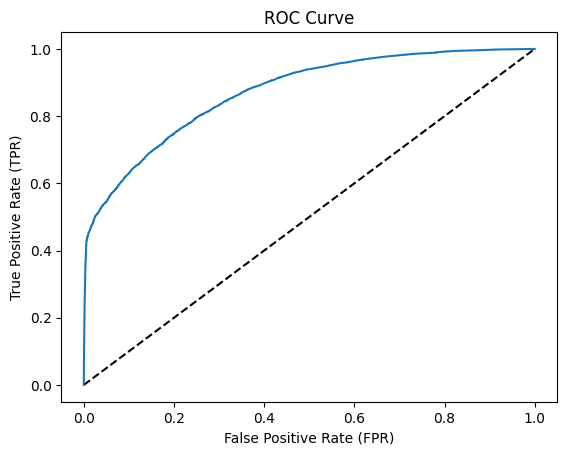

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


rf = RandomForestClassifier(n_estimators=150)
rf.fit(x_train, y_train)
y_probability = rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_probability)

plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.show(block=True)
# print(sklearn.metrics.roc_auc_score(y_test, y_proba[:, 0]))


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier()
tree = tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)
ibpipe = imbpipe(steps=[('smote', SMOTE()), ('scaler', scaler), ('pca', pca), ('tree', tree)])

param_grid = {
    'tree__max_depth': [25, 35],
    'tree__min_samples_leaf': [15, 25],
    'tree__max_features': [9, 14]
}

grid_search_tree = GridSearchCV(ibpipe, param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(features, labels)

In [ ]:
print(grid_search_tree.best_params_)
print(grid_search_tree.best_score_*100)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
accuracies = sklearn.model_selection.cross_val_score(clf, features, labels, cv=10)
# print('Accuracy: ', accuracies.mean()*100)

predicted = sklearn.model_selection.cross_val_predict(clf, features, labels)
# print('\n', sklearn.metrics.classification_report(labels, predicted))
print(features)

        duration  explicit  danceability  energy  key  loudness  mode  \
0        230.666         0         0.676  0.4610    1    -6.746     0   
1        149.610         0         0.420  0.1660    1   -17.235     1   
2        210.826         0         0.438  0.3590    0    -9.734     1   
3        201.933         0         0.266  0.0596    0   -18.515     1   
4        198.853         0         0.618  0.4430    2    -9.681     1   
...          ...       ...           ...     ...  ...       ...   ...   
113995   384.999         0         0.172  0.2350    5   -16.393     1   
113996   385.000         0         0.174  0.1170    0   -18.318     0   
113997   271.466         0         0.629  0.3290    0   -10.895     0   
113998   283.893         0         0.587  0.5060    7   -10.889     1   
113999   241.826         0         0.526  0.4870    1   -10.204     0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.1430        0.0322          0.0000

In [ ]:
lieben_wir = [[155.507, 1, .666, .669, 10, -7.62, 0, .329, .0113, .00000732, .0795, .806, 95.939, 4]]
corso = [[146.482, 0, .703, .845, 10, -4.851, 0, .337, .169, 0, .122, .745, 97.672, 4]]
